In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F #允许我们使用 relu 激活函数，这是非线性。  torch.nn.functional 包含了常用的激活函数和其他操作。
import matplotlib.pyplot as plt
import sklearn.datasets

In [2]:
x,y = sklearn.datasets.make_moons(200, noise = 0.20)

In [5]:
print(x[:3], type(x))
print(y[:3], type(y))

[[ 0.1993536   1.333878  ]
 [-0.93800566  0.77015739]
 [-0.66861511  0.42790839]] <class 'numpy.ndarray'>
[0 0 0] <class 'numpy.ndarray'>


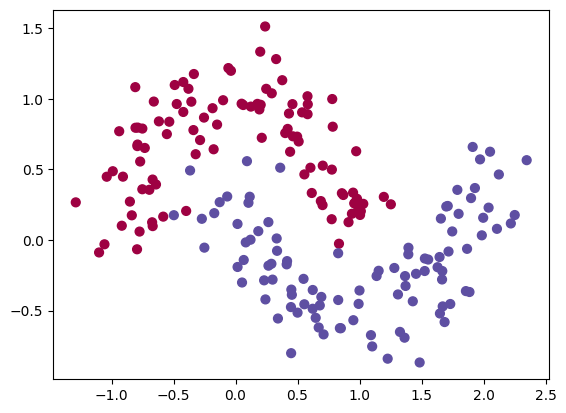

In [12]:
plt.scatter(x[:,0],x[:,1], s = 40, c = y, cmap = plt.cm.Spectral) # s - point size, c - color
plt.show()
# 这里的x轴y轴都是特征 即 x[:,0],x[:,1], 那么就是2个输入

In [13]:
x = torch.FloatTensor(x) #为什么我们使用浮点张量？如果你看到X，那么X数据集有小数，所以最初是浮点值。这就是我们使用浮点数的原因。
y = torch.LongTensor(y) #通常当你有标签时，然后你想将其转换为长张量。

In [10]:
print(x[:3], type(x))
print(y[:3], type(y))

[[ 0.1993536   1.333878  ]
 [-0.93800566  0.77015739]
 [-0.66861511  0.42790839]] <class 'numpy.ndarray'>
[0 0 0] <class 'numpy.ndarray'>


In [14]:
# 现在我们要从 nn.module 继承。为什么？因为我们要使用线性层。线性层是 nn.module 的一部分,所以这就是为什么我们需要从 nn.module 继承。
# 因为我们要用它的功能。那么 torch.nn.module，这就是在 Python 中继承的方式。
class FeedForward(torch.nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons): #这是类的构造函数 __init__，用于初始化模型对象
        super(FeedForward,self).__init__() #super(FeedForward, self).__init__() 调用父类 nn.Module 的构造函数
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons,output_neurons)
    def forward(self, x): #再次强调，forward 函数负责前向传播。很抱歉，定义向前,请记住，forward功能已包含在在 NN.module 中。基本上，当我们继承 NN.module 时，已经有转发功能。但我们在这里做的是覆盖前向.因为我们想要适合我们目前的神经网络
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x

### 代码解释

```python
import torch
import torch.nn as nn
import torch.nn.functional as F
```
这几行代码导入了 PyTorch 的必要模块：
- `torch` 是 PyTorch 的核心库。
- `torch.nn` 包含了构建神经网络的模块。
- `torch.nn.functional` 包含了常用的激活函数和其他操作。

```python
class FeedForward(torch.nn.Module):
```
这行代码定义了一个名为 `FeedForward` 的类，并继承自 `torch.nn.Module`。这是创建自定义神经网络模型的标准做法。

```python
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
```
这是类的构造函数 `__init__`，用于初始化模型对象。`super(FeedForward, self).__init__()` 调用父类 `nn.Module` 的构造函数。

```python
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)
```
这两行代码定义了两个全连接层（fully connected layers）：
- `self.hidden`：输入特征数为 `input_neurons`，输出特征数为 `hidden_neurons`。
- `self.out`：输入特征数为 `hidden_neurons`，输出特征数为 `output_neurons`。

```python
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x
```
这是 `forward` 方法，用于定义模型的前向传播过程。输入 `x` 依次通过隐藏层、ReLU 激活函数和输出层，最终返回输出 `x`。

### 代码优化建议

1. **类型注解**：可以添加类型注解，以提高代码的可读性和可维护性。
2. **文档字符串**：可以添加文档字符串，以便更好地描述类和方法的功能。

优化后的代码如下：

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForward(nn.Module):
    """
    一个简单的前馈神经网络，包含一个隐藏层和一个输出层。
    """

    def __init__(self, input_neurons: int, hidden_neurons: int, output_neurons: int):
        """
        初始化前馈神经网络。

        参数:
        input_neurons (int): 输入层神经元数量
        hidden_neurons (int): 隐藏层神经元数量
        output_neurons (int): 输出层神经元数量
        """
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        定义前向传播过程。

        参数:
        x (torch.Tensor): 输入张量

        返回:
        torch.Tensor: 输出张量
        """
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x

# 示例用法
# 假设 input_neurons, hidden_neurons, output_neurons 已经定义
# input_neurons = 10
# hidden_neurons = 5
# output_neurons = 1
# model = FeedForward(input_neurons, hidden_neurons, output_neurons)
# x = torch.randn(1, input_neurons)
# output = model(x)
```

这样可以使代码更加清晰和易读，同时提供了更多的上下文信息。

In [15]:
network = FeedForward(input_neurons = 2, hidden_neurons = 50, output_neurons = 2) #hidden_neurons 应该超过20, 一般老师是很少用低于50的, 输出 你是0 or 1 所以也是两个类
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02) #torch.optim 的输入参数是什么？这基本上就是你的权重或网络的参数。是使用 .parameters 属性，这将返回神经网络的权重
loss_function = torch.nn.CrossEntropyLoss() # 因为我们的输出层有2个神经元
#选择二元交叉熵（binary cross-entropy）还是交叉熵（cross-entropy）的条件。具体来说，当输出层只有一个神经元且不使用softmax时，使用二元交叉熵；而当输出层有多个神经元并使用softmax时，使用交叉熵。PyTorch默认会为交叉熵定义softmax。

### 二元交叉熵（Binary Cross-Entropy）和交叉熵（Cross-Entropy）

二元交叉熵和交叉熵都是用于衡量预测值与真实值之间差异的损失函数，常用于分类问题中。它们在计算方式和应用场景上有所不同。

### 二元交叉熵（Binary Cross-Entropy）

#### 定义

二元交叉熵（Binary Cross-Entropy），也称为对数损失（Log Loss），用于二分类问题。它衡量的是模型预测的概率分布与真实标签之间的差异。

给定真实标签 \( y \) 和预测概率 \( \hat{y} \)，二元交叉熵的公式为：

\[ \text{Binary Cross-Entropy} = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right) \]

其中：
- \( y \) 是真实标签，取值为0或1。
- \( \hat{y} \) 是模型预测的概率，取值在0到1之间。

#### 作用

二元交叉熵用于衡量二分类问题中模型预测的概率分布与真实标签之间的差异。它通过最大化正确类别的概率来优化模型。

#### 适用场景

- 二分类问题：例如垃圾邮件分类（垃圾邮件或非垃圾邮件）、疾病预测（患病或未患病）等。
- 输出层只有一个神经元，表示属于某一类别的概率。

### 交叉熵（Cross-Entropy）

#### 定义

交叉熵（Cross-Entropy）用于多分类问题。它衡量的是模型预测的概率分布与真实标签之间的差异。

给定真实标签 \( y \) 和预测概率 \( \hat{y} \)，交叉熵的公式为：

\[ \text{Cross-Entropy} = - \sum_{i=1}^{C} y_i \log(\hat{y}_i) \]

其中：
- \( C \) 是类别的数量。
- \( y_i \) 是真实标签的独热编码（one-hot encoding），对于正确类别为1，其余为0。
- \( \hat{y}_i \) 是模型预测的概率，取值在0到1之间。

#### 作用

交叉熵用于衡量多分类问题中模型预测的概率分布与真实标签之间的差异。它通过最大化正确类别的概率来优化模型。

#### 适用场景

- 多分类问题：例如图像分类（猫、狗、鸟等）、文本分类（正面评论、中性评论、负面评论等）等。
- 输出层有多个神经元，每个神经元表示属于某一类别的概率。
- 通常与Softmax激活函数一起使用，以确保输出是一个概率分布。

### 什么时候使用

- **二元交叉熵（Binary Cross-Entropy）**：
  - 当你处理的是二分类问题时使用。
  - 输出层只有一个神经元，表示属于某一类别的概率。
  - 不使用Softmax激活函数。

- **交叉熵（Cross-Entropy）**：
  - 当你处理的是多分类问题时使用。
  - 输出层有多个神经元，每个神经元表示属于某一类别的概率。
  - 通常与Softmax激活函数一起使用，以确保输出是一个概率分布。

### 例子

1. **二元交叉熵**：
   - 问题：垃圾邮件分类。
   - 模型输出：一个神经元，输出概率 \( \hat{y} \)。
   - 损失函数：二元交叉熵。

2. **交叉熵**：
   - 问题：图像分类（猫、狗、鸟）。
   - 模型输出：三个神经元，分别表示属于猫、狗、鸟的概率 \( \hat{y}_1, \hat{y}_2, \hat{y}_3 \)。
   - 损失函数：交叉熵。

### 结论

二元交叉熵和交叉熵都是用于衡量预测值与真实值之间差异的损失函数。二元交叉熵用于二分类问题，输出层只有一个神经元；交叉熵用于多分类问题，输出层有多个神经元，并且通常与Softmax激活函数一起使用。选择合适的损失函数可以帮助模型更好地优化和训练。

### 总结

选择二元交叉熵（binary cross-entropy）还是交叉熵（cross-entropy）的条件。具体来说，当输出层只有一个神经元且不使用softmax时，使用二元交叉熵；而当输出层有多个神经元并使用softmax时，使用交叉熵。PyTorch默认会为交叉熵定义softmax。

### 重要信息提取

1. **损失函数选择**：
   - 二元交叉熵（binary cross-entropy）：输出层只有一个神经元且不使用softmax。
   - 交叉熵（cross-entropy）：输出层有多个神经元并使用softmax。

2. **二元交叉熵条件**：
   - 输出层必须只有一个神经元。
   - 不使用softmax。

3. **交叉熵条件**：
   - 输出层有多个神经元。
   - 使用softmax。

4. **PyTorch默认行为**：
   - 当使用交叉熵时，PyTorch默认会定义softmax。

### 详细解释

1. **二元交叉熵（binary cross-entropy）**：
   - 适用于二分类问题。
   - 输出层只有一个神经元，表示属于某一类别的概率。
   - 不使用softmax，因为输出已经是概率值。

2. **交叉熵（cross-entropy）**：
   - 适用于多分类问题。
   - 输出层有多个神经元，每个神经元表示属于某一类别的概率。
   - 使用softmax将输出转换为概率分布。

3. **PyTorch默认行为**：
   - 当使用交叉熵作为损失函数时，PyTorch会自动在内部应用softmax。
   - 用户不需要显式定义softmax。

### 结论

在定义损失函数时，选择二元交叉熵还是交叉熵取决于输出层的神经元数量和是否使用softmax。对于二分类问题，使用二元交叉熵；对于多分类问题，使用交叉熵。PyTorch会自动为交叉熵定义softmax，简化了用户的操作。

### Softmax是什么

Softmax是一种激活函数，常用于多分类问题的神经网络输出层。它将一个包含任意实数的向量转换为一个概率分布。具体来说，Softmax函数将输入向量中的每个元素映射到(0, 1)之间，并且所有元素的和为1。

### Softmax函数的定义

给定一个输入向量 \( z = [z_1, z_2, ..., z_n] \)，Softmax函数的输出为：

\[ \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}} \]

其中：
- \( e \) 是自然对数的底（约等于2.718）。
- \( z_i \) 是输入向量中的第 \( i \) 个元素。
- \( \sum_{j=1}^{n} e^{z_j} \) 是所有输入元素的指数和。

### Softmax的特点

1. **概率分布**：Softmax的输出是一个概率分布，每个元素的值在0到1之间，并且所有元素的和为1。
2. **区分度**：Softmax函数会放大输入向量中较大的值，使其对应的概率更高，而较小的值对应的概率更低。这有助于模型更明确地进行分类。
3. **可微性**：Softmax函数是可微的，这使得它适用于梯度下降等优化算法。

### Softmax的应用

1. **多分类问题**：在多分类问题中，Softmax通常用于神经网络的输出层，将网络的输出转换为各个类别的概率。
2. **语言模型**：在自然语言处理任务中，Softmax用于预测下一个单词的概率分布。

### 例子

假设我们有一个三分类问题，神经网络的输出层有三个神经元，输出向量为 \( z = [2.0, 1.0, 0.1] \)。我们可以使用Softmax函数将其转换为概率分布：

1. 计算每个元素的指数：
   \[ e^{2.0} \approx 7.389 \]
   \[ e^{1.0} \approx 2.718 \]
   \[ e^{0.1} \approx 1.105 \]

2. 计算指数和：
   \[ 7.389 + 2.718 + 1.105 \approx 11.212 \]

3. 计算每个元素的Softmax值：
   \[ \text{Softmax}(2.0) = \frac{7.389}{11.212} \approx 0.659 \]
   \[ \text{Softmax}(1.0) = \frac{2.718}{11.212} \approx 0.242 \]
   \[ \text{Softmax}(0.1) = \frac{1.105}{11.212} \approx 0.099 \]

最终的概率分布为 \( [0.659, 0.242, 0.099] \)，表示第一个类别的概率最高。

### 结论

Softmax函数是一种常用于多分类问题的激活函数，它将输入向量转换为概率分布，使得每个元素的值在0到1之间，并且所有元素的和为1。通过放大较大的值，Softmax函数有助于模型更明确地进行分类。

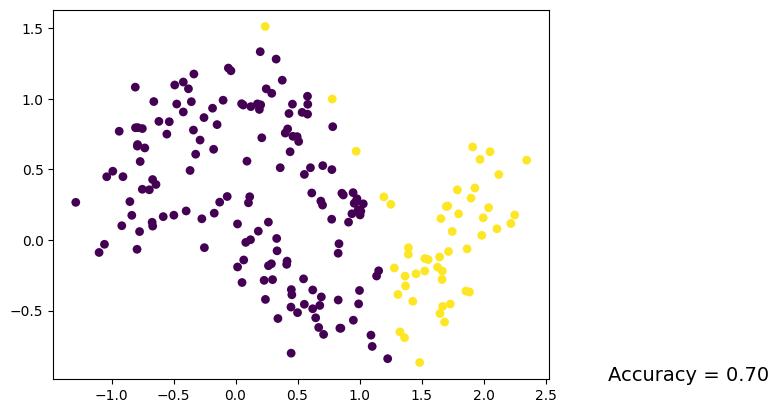

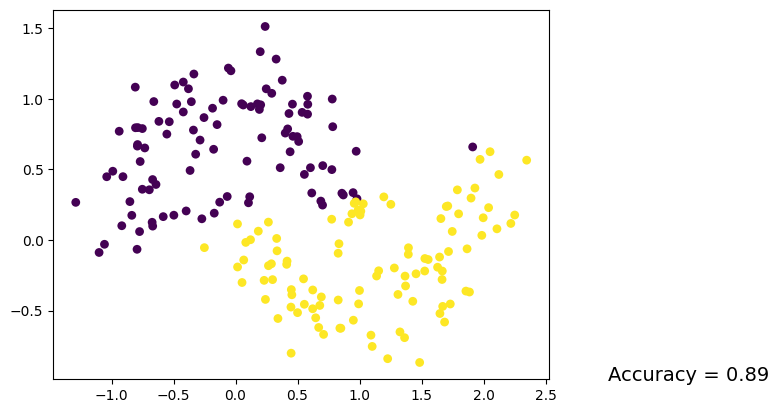

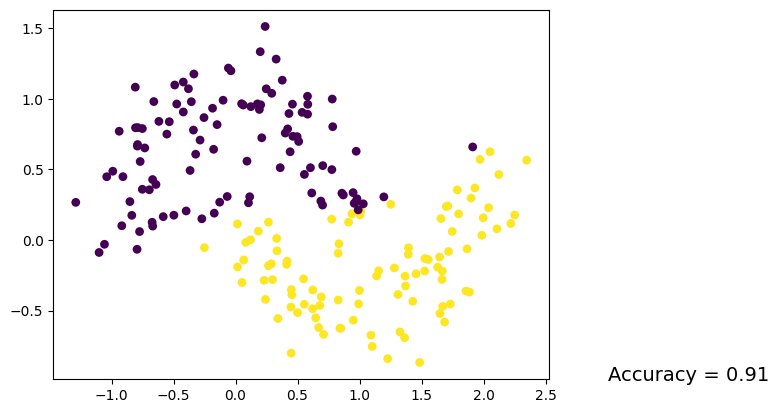

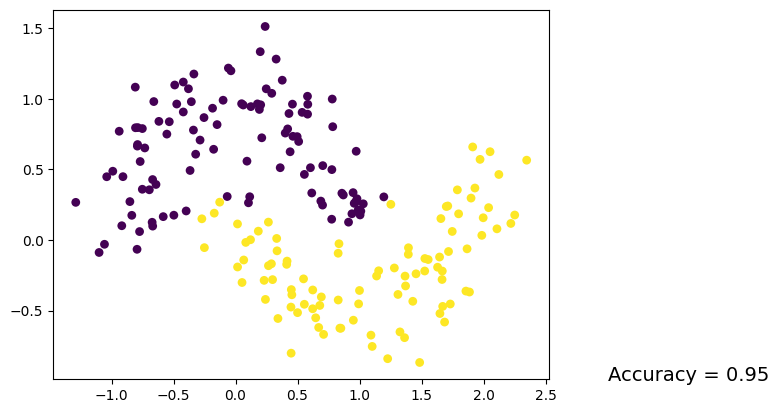

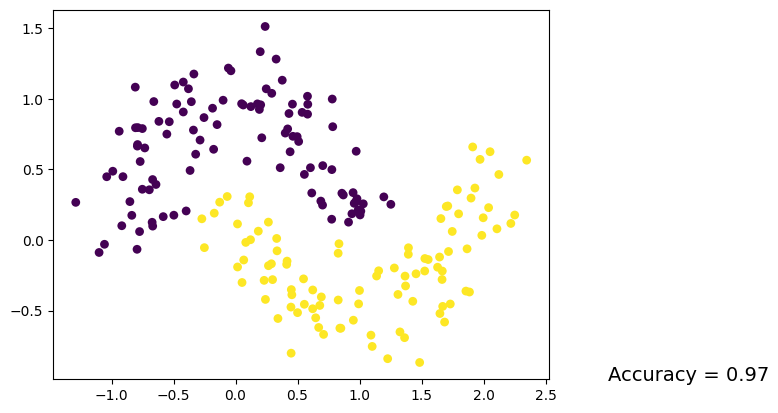

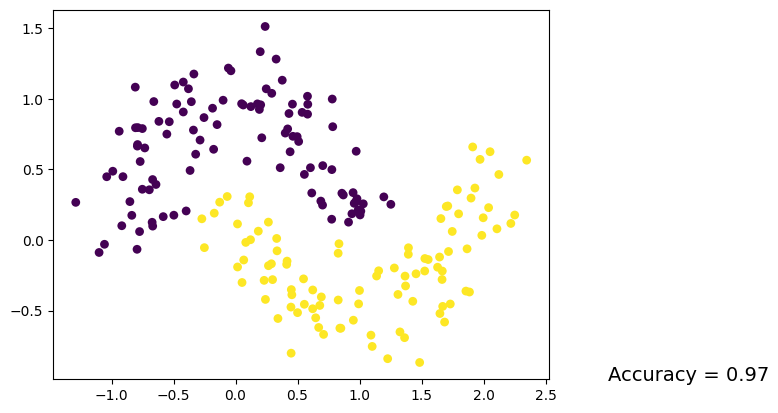

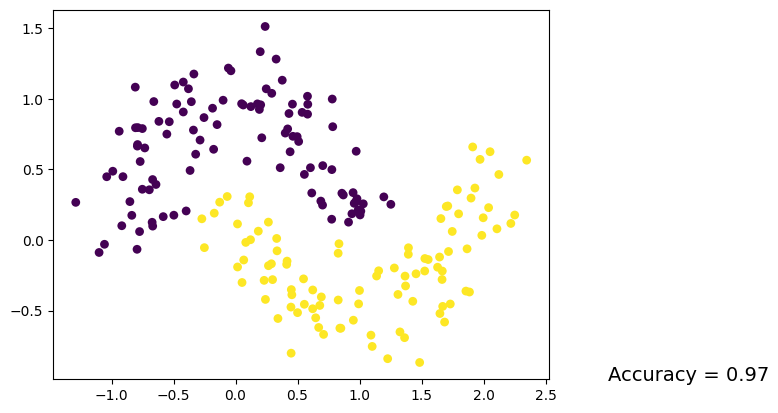

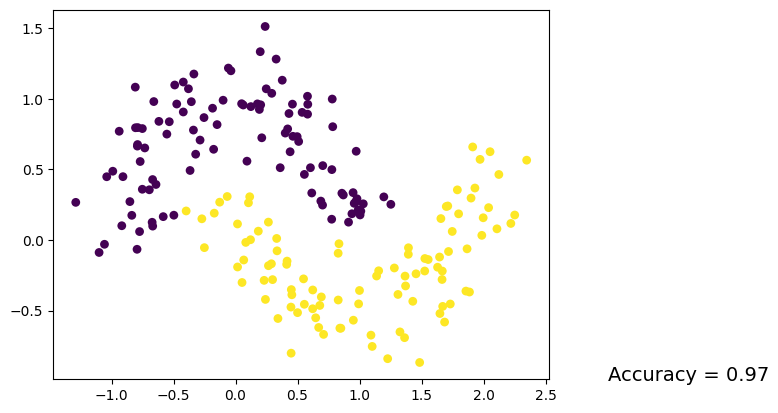

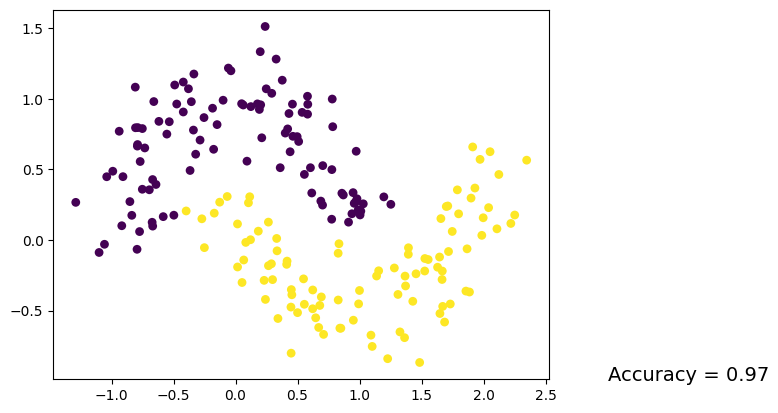

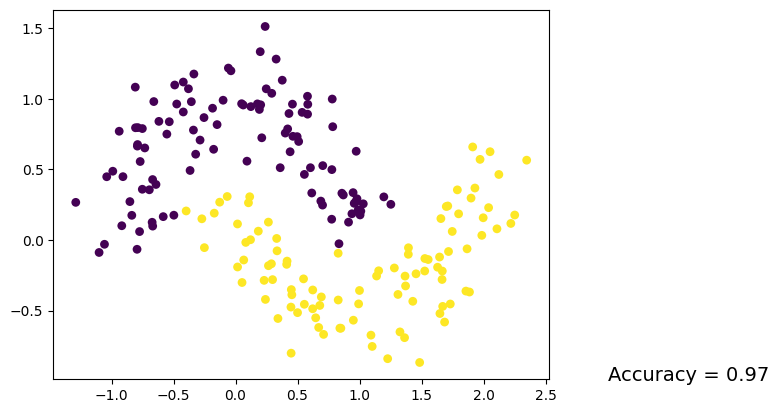

In [16]:
plt.ion()
for epoch in range(10000):#这行代码开始一个训练循环，总共进行 10,000 个训练轮次（epoch） #我试验过，发现为了使模型收敛，那么我们需要 10,000 个 epoch，大约 10,000 个
    #将输入数据 x 传递给神经网络 network，得到输出 out
    out = network(x) #现在我们要做的第一件事是什么？我们要向前传播,那么我们如何向前传播是通过调用对象?我们在这里创建的就是Network。
    #首先，我们称之为Object，我们将指定 x。所以我们想通过网络向前传播 x。现在有另一种方法可以做到这一点,是通过执行network.forward(x),这都是一样的,但是一旦你从 nn.Module 继承，然后一旦你基本上调用对象.并在对象的括号内指定 x.你创造的完全一样
    # 称为前向传播。所以这是同样的事情。您可以执行其中任意一项。
    loss = loss_function(out,y) #计算输出 out 和真实标签 y 之间的损失 loss
    optimizer.zero_grad()#清除优化器的梯度缓存，以防止梯度累积
    loss.backward() #执行反向传播，计算当前批次的梯度
    optimizer.step()#更新网络权重

    if epoch % 1000 == 0: #每 1000 个训练轮次执行一次以下代码块，用于显示训练过程
         # show the learning process up until now
        max_value, prediction = torch.max(out,1) #计算每个样本的最大值及其索引，prediction 是预测的类别索引
        predicted_y = prediction.data.numpy() #将预测值和真实标签转换为 NumPy 数组
        target_y = y.data.numpy() #将预测值和真实标签转换为 NumPy 数组
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], s = 40, c = predicted_y, lw = 0)
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)

plt.ioff()
plt.show()